In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [3]:
# df = pd.read_html("https://fbref.com/en/comps/Big5/2019-2020/defense/players/2019-2020-Big-5-European-Leagues-Stats")[0]
# df

In [4]:
# df = df.droplevel(0, axis=1)

In [5]:
# df.to_csv('mid_pressures.csv', index=False)

In [42]:
df = pd.read_csv('./mid_pressures.csv')
pd.set_option('display.max_columns', None)

In [43]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Past,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err,Matches
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,28,1990,27.9,51,32,33,16,2,22,54,40.7,32,267,74,27.7,159,71,37,57,13,1,44,23,74,67,3,Matches
1,2,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,19,2000,36.0,64,36,40,17,7,21,45,46.7,24,487,132,27.1,283,142,62,100,30,2,70,20,84,86,0,Matches
2,3,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,31,1987,28.0,61,37,43,16,2,14,28,50.0,14,299,111,37.1,189,97,13,43,19,0,24,24,85,166,1,Matches
3,4,Suleiman Abdullahi,ng NGA,"FW,MF",Union Berlin,de Bundesliga,22,1996,1.7,1,1,1,0,0,1,3,33.3,2,25,9,36.0,9,11,5,3,1,0,2,1,2,2,0,Matches
4,5,Mehdi Abeid,dz ALG,MF,Nantes,fr Ligue 1,26,1992,20.2,60,41,24,34,2,24,62,38.7,38,417,114,27.3,121,233,63,18,3,0,15,17,77,22,0,Matches


In [44]:
def cleaner(df):
    all_columns = list(df.columns)
    unwanted_columns = {'Rk','Player','Nation','Pos','Squad','Comp','Matches'}
    index_columns = [ele for ele in all_columns if ele not in unwanted_columns]
    num_df = df.loc[:,index_columns].apply(pd.to_numeric, errors='coerce')
    num_df.fillna(0, inplace=True)
    master_df = pd.concat([df[['Player','Pos','Squad','Comp']], num_df], axis = 1)
    return master_df   

In [45]:
df=cleaner(df)

In [46]:
pressure = df.iloc[:, 16:22]

In [47]:
pressure

,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1
0,267.0,74.0,27.7,159.0,71.0,37.0
1,487.0,132.0,27.1,283.0,142.0,62.0
2,299.0,111.0,37.1,189.0,97.0,13.0
3,25.0,9.0,36.0,9.0,11.0,5.0
4,417.0,114.0,27.3,121.0,233.0,63.0
...,...,...,...,...,...,...
2836,227.0,68.0,30.0,62.0,136.0,29.0
2837,3.0,1.0,33.3,1.0,1.0,1.0
2838,26.0,6.0,23.1,12.0,12.0,2.0
2839,517.0,125.0,24.2,96.0,263.0,158.0


In [48]:
master_df = pd.concat([df[['Player', 'Pos', 'Squad', 'Comp', '90s']], pressure], axis = 1)
master_df

,Player,Pos,Squad,Comp,90s,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1
0,Patrick van Aanholt,DF,Crystal Palace,eng Premier League,27.9,267.0,74.0,27.7,159.0,71.0,37.0
1,Max Aarons,DF,Norwich City,eng Premier League,36.0,487.0,132.0,27.1,283.0,142.0,62.0
2,Yunis Abdelhamid,DF,Reims,fr Ligue 1,28.0,299.0,111.0,37.1,189.0,97.0,13.0
3,Suleiman Abdullahi,"FW,MF",Union Berlin,de Bundesliga,1.7,25.0,9.0,36.0,9.0,11.0,5.0
4,Mehdi Abeid,MF,Nantes,fr Ligue 1,20.2,417.0,114.0,27.3,121.0,233.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...
2836,Bongani Zungu,MF,Amiens,fr Ligue 1,11.0,227.0,68.0,30.0,62.0,136.0,29.0
2837,Szymon Żurkowski,MF,Fiorentina,it Serie A,0.1,3.0,1.0,33.3,1.0,1.0,1.0
2838,David Zurutuza,MF,Real Sociedad,es La Liga,1.7,26.0,6.0,23.1,12.0,12.0,2.0
2839,Martin Ødegaard,MF,Real Sociedad,es La Liga,28.1,517.0,125.0,24.2,96.0,263.0,158.0


In [60]:
mask = ((master_df.Comp == 'es La Liga') | (master_df.Comp == 'eng Premier League')) & (master_df.Pos == 'MF') & (master_df['90s'] > 11)
def_actions = master_df.loc[mask]


In [61]:
def_actions

,Player,Pos,Squad,Comp,90s,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1
53,Rubén Alcaraz,MF,Valladolid,es La Liga,21.4,444.0,130.0,29.3,184.0,232.0,28.0
114,Mauro Arambarri,MF,Getafe,es La Liga,34.1,800.0,207.0,25.9,170.0,515.0,115.0
125,Stuart Armstrong,MF,Southampton,eng Premier League,19.1,408.0,129.0,31.6,115.0,187.0,106.0
156,Ramon Azeez,MF,Granada,es La Liga,15.1,330.0,82.0,24.8,58.0,191.0,81.0
159,Iddrisu Baba,MF,Mallorca,es La Liga,32.3,580.0,188.0,32.4,231.0,307.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...
2777,Harry Winks,MF,Tottenham,eng Premier League,24.7,435.0,130.0,29.9,196.0,203.0,36.0
2786,Granit Xhaka,MF,Arsenal,eng Premier League,28.7,433.0,126.0,29.1,157.0,232.0,44.0
2792,Okay Yokuşlu,MF,Celta Vigo,es La Liga,21.9,267.0,81.0,30.3,109.0,141.0,17.0
2808,Andre-Frank Zambo Anguissa,MF,Villarreal,es La Liga,28.7,592.0,156.0,26.4,150.0,353.0,89.0


In [62]:
def_actions['Succ p90'] = def_actions['Succ'] / def_actions['90s']
def_actions['Def 3rd p90'] = def_actions['Def 3rd.1'] / def_actions['90s']
def_actions['Mid 3rd p90'] = def_actions['Mid 3rd.1'] / def_actions['90s']
def_actions['Att 3rd p90'] = def_actions['Att 3rd.1'] / def_actions['90s']

/Users/ollinj01/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/ollinj01/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ollinj01/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [63]:
def_actions

,Player,Pos,Squad,Comp,90s,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Succ p90,Def 3rd p90,Mid 3rd p90,Att 3rd p90
53,Rubén Alcaraz,MF,Valladolid,es La Liga,21.4,444.0,130.0,29.3,184.0,232.0,28.0,6.074766,8.598131,10.841121,1.308411
114,Mauro Arambarri,MF,Getafe,es La Liga,34.1,800.0,207.0,25.9,170.0,515.0,115.0,6.070381,4.985337,15.102639,3.372434
125,Stuart Armstrong,MF,Southampton,eng Premier League,19.1,408.0,129.0,31.6,115.0,187.0,106.0,6.753927,6.020942,9.790576,5.549738
156,Ramon Azeez,MF,Granada,es La Liga,15.1,330.0,82.0,24.8,58.0,191.0,81.0,5.430464,3.841060,12.649007,5.364238
159,Iddrisu Baba,MF,Mallorca,es La Liga,32.3,580.0,188.0,32.4,231.0,307.0,42.0,5.820433,7.151703,9.504644,1.300310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,Harry Winks,MF,Tottenham,eng Premier League,24.7,435.0,130.0,29.9,196.0,203.0,36.0,5.263158,7.935223,8.218623,1.457490
2786,Granit Xhaka,MF,Arsenal,eng Premier League,28.7,433.0,126.0,29.1,157.0,232.0,44.0,4.390244,5.470383,8.083624,1.533101
2792,Okay Yokuşlu,MF,Celta Vigo,es La Liga,21.9,267.0,81.0,30.3,109.0,141.0,17.0,3.698630,4.977169,6.438356,0.776256
2808,Andre-Frank Zambo Anguissa,MF,Villarreal,es La Liga,28.7,592.0,156.0,26.4,150.0,353.0,89.0,5.435540,5.226481,12.299652,3.101045


In [64]:
mask=def_actions['Player']=='Thomas Partey'
def_actions.loc[mask]

,Player,Pos,Squad,Comp,90s,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Succ p90,Def 3rd p90,Mid 3rd p90,Att 3rd p90
1974,Thomas Partey,MF,Atlético Madrid,es La Liga,28.3,445.0,138.0,31.0,179.0,219.0,47.0,4.876325,6.325088,7.738516,1.660777


In [65]:
def_actions["Def 3rd p90"].mean()

6.313201048179748

In [66]:
def_actions["Mid 3rd p90"].mean()

10.036217194801825

In [67]:
def_actions["Att 3rd p90"].mean()

3.103273852256634

In [68]:
pressure_cols = ['Def 3rd.1', 'Mid 3rd.1', 'Att 3rd.1']
df_total = pd.DataFrame(df[pressure_cols].sum())
df_total.columns = ['total']
df_total = df_total.T
df_total = df_total.divide(df_total.sum(axis=1), axis=0) * 100

In [69]:
df_total

,Def 3rd.1,Mid 3rd.1,Att 3rd.1
total,32.734774,45.083425,22.181801


In [70]:
# Drop columns
master_df1 = def_actions.drop(['Player','Pos','Squad','Comp','90s','Press','Succ','%','Def 3rd.1','Mid 3rd.1','Att 3rd.1'], axis=1)

In [71]:
DFNom=master_df1.rank(pct=True)

In [72]:
master_df = pd.concat([def_actions[['Player','Squad','90s','Press','Succ','%']], DFNom], axis = 1)
master_df.head()

,Player,Squad,90s,Press,Succ,%,Succ p90,Def 3rd p90,Mid 3rd p90,Att 3rd p90
53,Rubén Alcaraz,Valladolid,21.4,444.0,130.0,29.3,0.748252,0.860140,0.664336,0.083916
114,Mauro Arambarri,Getafe,34.1,800.0,207.0,25.9,0.734266,0.314685,0.972028,0.629371
125,Stuart Armstrong,Southampton,19.1,408.0,129.0,31.6,0.881119,0.510490,0.489510,0.937063
156,Ramon Azeez,Granada,15.1,330.0,82.0,24.8,0.552448,0.104895,0.846154,0.930070
159,Iddrisu Baba,Mallorca,32.3,580.0,188.0,32.4,0.657343,0.657343,0.447552,0.076923


In [73]:
mask = (master_df.Squad == 'Arsenal')
ars = master_df.loc[mask]

In [74]:
ars

,Player,Squad,90s,Press,Succ,%,Succ p90,Def 3rd p90,Mid 3rd p90,Att 3rd p90
496,Dani Ceballos,Arsenal,18.8,445.0,120.0,27.0,0.811189,0.972028,0.566434,0.531469
1062,Mattéo Guendouzi,Arsenal,19.4,384.0,109.0,28.4,0.601399,0.804196,0.384615,0.405594
1942,Mesut Özil,Arsenal,16.0,305.0,63.0,20.7,0.083916,0.160839,0.713287,0.727273
2607,Lucas Torreira,Arsenal,16.8,403.0,102.0,25.3,0.741259,0.930070,0.790210,0.447552
2786,Granit Xhaka,Arsenal,28.7,433.0,126.0,29.1,0.209790,0.419580,0.209790,0.146853


In [75]:
mask = (master_df.Player == 'Thomas Partey')
aou = master_df.loc[mask]
aou

,Player,Squad,90s,Press,Succ,%,Succ p90,Def 3rd p90,Mid 3rd p90,Att 3rd p90
1974,Thomas Partey,Atlético Madrid,28.3,445.0,138.0,31.0,0.377622,0.538462,0.13986,0.160839


In [76]:
pressure = list(ars)[6:]

In [77]:
pressure1 = list(aou)[6:]

In [78]:
presNo = len(pressure)

In [79]:
ars

,Player,Squad,90s,Press,Succ,%,Succ p90,Def 3rd p90,Mid 3rd p90,Att 3rd p90
496,Dani Ceballos,Arsenal,18.8,445.0,120.0,27.0,0.811189,0.972028,0.566434,0.531469
1062,Mattéo Guendouzi,Arsenal,19.4,384.0,109.0,28.4,0.601399,0.804196,0.384615,0.405594
1942,Mesut Özil,Arsenal,16.0,305.0,63.0,20.7,0.083916,0.160839,0.713287,0.727273
2607,Lucas Torreira,Arsenal,16.8,403.0,102.0,25.3,0.741259,0.930070,0.790210,0.447552
2786,Granit Xhaka,Arsenal,28.7,433.0,126.0,29.1,0.209790,0.419580,0.209790,0.146853


In [80]:
ceballos = ars.iloc[0,6:].tolist()
guendouzi = ars.iloc[1,6:].tolist()
ozil = ars.iloc[2,6:].tolist()
torreira = ars.iloc[3,6:].tolist()
xhaka = ars.iloc[4,6:].tolist()
aouar = aou.iloc[0,6:].tolist()

In [81]:
ceballos

[0.8111888111888111, 0.972027972027972, 0.5664335664335665, 0.5314685314685315]

In [82]:
aou

,Player,Squad,90s,Press,Succ,%,Succ p90,Def 3rd p90,Mid 3rd p90,Att 3rd p90
1974,Thomas Partey,Atlético Madrid,28.3,445.0,138.0,31.0,0.377622,0.538462,0.13986,0.160839


In [83]:
aouar

[0.3776223776223776,
 0.5384615384615384,
 0.13986013986013987,
 0.16083916083916083]

In [84]:
values1 = aou.iloc[0,6:].tolist()

In [85]:
values1

[0.3776223776223776,
 0.5384615384615384,
 0.13986013986013987,
 0.16083916083916083]

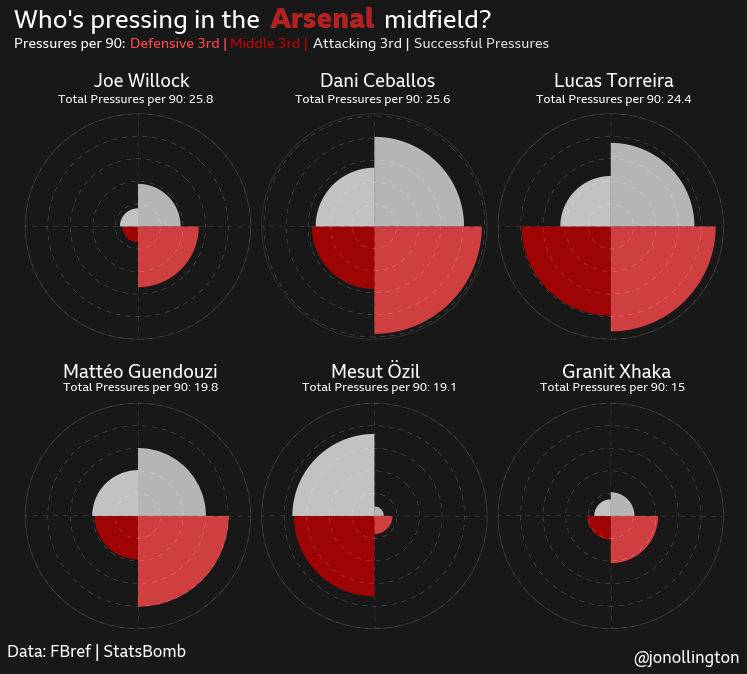

In [86]:
fig, axs = plt.subplots(2, 3, subplot_kw=dict(polar=True), figsize=(10,9),constrained_layout=False)

csfont = {'fontname':'BBC Reith Sans'}
hfont = {'fontname':'BBC Reith Sans'}

fig.text(0,1.03,"Who's pressing in the",color="white",fontsize=25, **csfont)
fig.text(0.355,1.03,"Arsenal",color="firebrick",fontsize=28,fontweight="bold", **csfont)
fig.text(0.514,1.03,"midfield?",color="white",fontsize=25, **csfont)
fig.text(0,1,"Pressures per 90:",color="white",fontsize=14, **csfont)
fig.text(0.16,1,"Defensive 3rd |",color="#ff4949",fontsize=14, **csfont)
fig.text(0.3,1,"Middle 3rd |",color="#c10000",fontsize=14, **csfont)
fig.text(0.415,1,"Attacking 3rd |",color="#eeeeee",fontsize=14, **csfont)
fig.text(0.555,1,"Successful Pressures",color="#dedede",fontsize=14, **csfont)

fig.text(0.86,0.05,"@jonollington",color="white",fontsize=16, **csfont)
fig.text(-0.01,0.06,"Data: FBref | StatsBomb",color="white",fontsize=16, **csfont)


fig.set_facecolor("#181818")

values = ars.iloc[0,6:].tolist()
data = values
N = len(data)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
width = 2 * np.pi / N
color_list = ['#dedede', '#ff4949','#c10000', '#eeeeee']

values1 = aou.iloc[0,6:].tolist()
data1 = values1
N1 = len(data1)
theta1 = np.linspace(0.0, 2 * np.pi, N1, endpoint=False)
width1 = 2 * np.pi / N1
color_list = ['#dedede', '#ff4949','#c10000', '#eeeeee']

fig.text(0.11,0.94,"Joe Willock",color="white",fontsize=18, **csfont)
fig.text(0.06,0.915,"Total Pressures per 90: 25.8",color="white",fontsize=12, **csfont)
axs[0,0].bar(theta1, aouar, width=width1, bottom=0.0, color=color_list,alpha=0.8)
fig.text(0.425,0.94,"Dani Ceballos",color="white",fontsize=18, **csfont)
fig.text(0.39,0.915,"Total Pressures per 90: 25.6",color="white",fontsize=12, **csfont)
axs[0,1].bar(theta, ceballos, width=width, bottom=0.0,color=color_list,alpha=0.8)
fig.text(0.75,0.94,"Lucas Torreira",color="white",fontsize=18, **csfont)
fig.text(0.725,0.915,"Total Pressures per 90: 24.4",color="white",fontsize=12, **csfont)
axs[0,2].bar(theta, torreira, width=width, bottom=0.0,color=color_list,alpha=0.8)
fig.text(0.0675,0.49,"Mattéo Guendouzi",color="white",fontsize=18, **csfont)
fig.text(0.0675,0.47,"Total Pressures per 90: 19.8",color="white",fontsize=12, **csfont)
axs[1,0].bar(theta, guendouzi, width=width, bottom=0.0,color=color_list,alpha=0.8)
fig.text(0.44,0.49,"Mesut Özil",color="white",fontsize=18, **csfont)
fig.text(0.4,0.47,"Total Pressures per 90: 19.1",color="white",fontsize=12, **csfont)
axs[1,1].bar(theta, ozil, width=width, bottom=0.0,color=color_list,alpha=0.8)
fig.text(0.76,0.49,"Granit Xhaka",color="white",fontsize=18, **csfont)
fig.text(0.73,0.47,"Total Pressures per 90: 15",color="white",fontsize=12, **csfont)
axs[1,2].bar(theta, xhaka, width=width, bottom=0.0, color=color_list,alpha=0.8)

axs[0,0].yaxis.set_ticks([0,0.2,0.4,0.6,0.8,1])
axs[0,1].yaxis.set_ticks([0,0.2,0.4,0.6,0.8,1])
axs[0,2].yaxis.set_ticks([0,0.2,0.4,0.6,0.8,1])
axs[1,0].yaxis.set_ticks([0,0.2,0.4,0.6,0.8,1])
axs[1,1].yaxis.set_ticks([0,0.2,0.4,0.6,0.8,1])
axs[1,2].yaxis.set_ticks([0,0.2,0.4,0.6,0.8,1])

axs[0,0].xaxis.set_ticklabels([])
axs[0,1].xaxis.set_ticklabels([])
axs[0,2].xaxis.set_ticklabels([])
axs[1,0].xaxis.set_ticklabels([])
axs[1,1].xaxis.set_ticklabels([])
axs[1,2].xaxis.set_ticklabels([])

axs[0,0].yaxis.set_ticklabels([])
axs[0,1].yaxis.set_ticklabels([])
axs[0,2].yaxis.set_ticklabels([])
axs[1,0].yaxis.set_ticklabels([])
axs[1,1].yaxis.set_ticklabels([])
axs[1,2].yaxis.set_ticklabels([])

axs[0,0].yaxis.grid(False)
axs[0,1].yaxis.grid(False)
axs[0,2].yaxis.grid(False)
axs[1,0].yaxis.grid(False)
axs[1,1].yaxis.grid(False)
axs[1,2].yaxis.grid(False)

axs[0,0].yaxis.grid(color='white', linewidth=0.5, linestyle='dashed',dashes=(10, 10),alpha=0.3,zorder=10)
axs[0,1].yaxis.grid(color='white', linewidth=0.5, linestyle='dashed',dashes=(10, 10),alpha=0.3,zorder=10)
axs[0,2].yaxis.grid(color='white', linewidth=0.5, linestyle='dashed',dashes=(10, 10),alpha=0.3,zorder=10)
axs[1,0].yaxis.grid(color='white', linewidth=0.5, linestyle='dashed',dashes=(10, 10),alpha=0.3,zorder=10)
axs[1,1].yaxis.grid(color='white', linewidth=0.5, linestyle='dashed',dashes=(10, 10),alpha=0.3,zorder=10)
axs[1,2].yaxis.grid(color='white', linewidth=0.5, linestyle='dashed',dashes=(10, 10),alpha=0.3,zorder=10)

axs[0,0].xaxis.grid(True,color='white',linestyle='dashed', dashes=(10, 10),linewidth=0.5,alpha=0.2)
axs[0,1].xaxis.grid(True,color='white',linestyle='dashed', dashes=(10, 10),linewidth=0.5,alpha=0.2)
axs[0,2].xaxis.grid(True,color='white',linestyle='dashed', dashes=(10, 10),linewidth=0.5,alpha=0.2)
axs[1,0].xaxis.grid(True,color='white',linestyle='dashed', dashes=(10, 10),linewidth=0.5,alpha=0.2)
axs[1,1].xaxis.grid(True,color='white',linestyle='dashed', dashes=(10, 10),linewidth=0.5,alpha=0.2)
axs[1,2].xaxis.grid(True,color='white',linestyle='dashed', dashes=(10, 10),linewidth=0.5,alpha=0.2)

axs[0,0].xaxis.set_ticks([0.79,2.35,3.93,5.5])
axs[0,1].xaxis.set_ticks([0.79,2.35,3.93,5.5])
axs[0,2].xaxis.set_ticks([0.79,2.35,3.93,5.5])
axs[1,0].xaxis.set_ticks([0.79,2.35,3.93,5.5])
axs[1,1].xaxis.set_ticks([0.79,2.35,3.93,5.5])
axs[1,2].xaxis.set_ticks([0.79,2.35,3.93,5.5])

axs[0,0].set_facecolor('#181818')
axs[0,1].set_facecolor('#181818')
axs[0,2].set_facecolor('#181818')
axs[1,0].set_facecolor('#181818')
axs[1,1].set_facecolor('#181818')
axs[1,2].set_facecolor('#181818')


# Fix axis to go in the right order and start at 12 o'clock.
axs[0,0].set_theta_offset(np.pi / 4)
axs[0,0].set_theta_direction(-1)
axs[0,0].spines['polar'].set_color('white')
axs[0,0].spines['polar'].set_linewidth(1)
axs[0,0].spines['polar'].set_alpha(0.1)

axs[0,1].set_theta_offset(np.pi / 4)
axs[0,1].set_theta_direction(-1)
axs[0,1].spines['polar'].set_color('white')
axs[0,1].spines['polar'].set_linewidth(1)
axs[0,1].spines['polar'].set_alpha(0.1)

axs[0,2].set_theta_offset(np.pi / 4)
axs[0,2].set_theta_direction(-1)
axs[0,2].spines['polar'].set_color('white')
axs[0,2].spines['polar'].set_linewidth(1)
axs[0,2].spines['polar'].set_alpha(0.1)

axs[1,0].set_theta_offset(np.pi / 4)
axs[1,0].set_theta_direction(-1)
axs[1,0].spines['polar'].set_color('white')
axs[1,0].spines['polar'].set_linewidth(1)
axs[1,0].spines['polar'].set_alpha(0.1)

axs[1,1].set_theta_offset(np.pi / 4)
axs[1,1].set_theta_direction(-1)
axs[1,1].spines['polar'].set_color('white')
axs[1,1].spines['polar'].set_linewidth(1)
axs[1,1].spines['polar'].set_alpha(0.1)

axs[1,2].set_theta_offset(np.pi / 4)
axs[1,2].set_theta_direction(-1)
axs[1,2].spines['polar'].set_color('white')
axs[1,2].spines['polar'].set_linewidth(1)
axs[1,2].spines['polar'].set_alpha(0.1)

fig.tight_layout()
plt.savefig("radar", dip=500, bbox_inches='tight')
plt.rcParams['axes.facecolor']='#181818'
plt.rcParams['savefig.facecolor']='#181818'
bg = "#181818"
fig.set_facecolor(bg)
# axs[0,0].xaxis.grid(True,color='#181818',linestyle='-', linewidth=3.9)


In [200]:
ars

,Player,Squad,90s,Press,Succ,%,Succ p90,Def 3rd p90,Mid 3rd p90,Att 3rd p90
496,Dani Ceballos,Arsenal,18.8,445.0,120.0,27.0,0.666667,0.960317,0.404762,0.555556
1062,Mattéo Guendouzi,Arsenal,19.4,384.0,109.0,28.4,0.436508,0.738095,0.222222,0.428571
1942,Mesut Özil,Arsenal,16.0,305.0,63.0,20.7,0.039683,0.111111,0.611111,0.694444
2607,Lucas Torreira,Arsenal,16.8,403.0,102.0,25.3,0.555556,0.896825,0.682540,0.468254
2786,Granit Xhaka,Arsenal,28.7,433.0,126.0,29.1,0.103175,0.230159,0.126984,0.111111


In [201]:
mask2=df.Squad=='Arsenal'
df.loc[mask2]

,Player,Pos,Squad,Comp,Age,Born,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,Past,Press,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,Blocks,Sh,ShSv,Pass,Int,Tkl+Int,Clr,Err
141,Pierre-Emerick Aubameyang,FW,Arsenal,eng Premier League,30.0,1989.0,34.8,39.0,24.0,15.0,14.0,10.0,12.0,50.0,24.0,38.0,573.0,130.0,22.7,113.0,256.0,204.0,59.0,2.0,0.0,57.0,9.0,48.0,16.0,0.0
249,Héctor Bellerín,DF,Arsenal,eng Premier League,24.0,1995.0,12.9,23.0,16.0,12.0,7.0,4.0,9.0,31.0,29.0,22.0,183.0,46.0,25.1,71.0,87.0,25.0,28.0,4.0,0.0,24.0,10.0,33.0,34.0,0.0
496,Dani Ceballos,MF,Arsenal,eng Premier League,22.0,1996.0,18.8,49.0,28.0,25.0,17.0,7.0,17.0,62.0,27.4,45.0,445.0,120.0,27.0,197.0,191.0,57.0,29.0,4.0,0.0,25.0,20.0,69.0,22.0,1.0
509,Calum Chambers,DF,Arsenal,eng Premier League,24.0,1995.0,12.2,25.0,18.0,14.0,8.0,3.0,9.0,12.0,75.0,3.0,143.0,51.0,35.7,77.0,41.0,25.0,21.0,7.0,0.0,14.0,13.0,38.0,61.0,0.0
1062,Mattéo Guendouzi,MF,Arsenal,eng Premier League,20.0,1999.0,19.4,24.0,13.0,11.0,9.0,4.0,10.0,36.0,27.8,26.0,384.0,109.0,28.4,159.0,174.0,51.0,40.0,7.0,0.0,33.0,22.0,46.0,48.0,0.0
1150,Rob Holding,DF,Arsenal,eng Premier League,23.0,1995.0,6.5,6.0,3.0,5.0,1.0,0.0,2.0,3.0,66.7,1.0,47.0,14.0,29.8,32.0,10.0,5.0,19.0,6.0,0.0,13.0,3.0,9.0,45.0,2.0
1343,Sead Kolašinac,DF,Arsenal,eng Premier League,26.0,1993.0,18.9,35.0,18.0,22.0,6.0,7.0,12.0,25.0,48.0,13.0,230.0,67.0,29.1,116.0,81.0,33.0,23.0,5.0,0.0,18.0,15.0,50.0,45.0,1.0
1397,Alexandre Lacazette,FW,Arsenal,eng Premier League,28.0,1991.0,20.8,23.0,19.0,6.0,12.0,5.0,4.0,17.0,23.5,13.0,464.0,114.0,24.6,55.0,220.0,189.0,13.0,0.0,0.0,13.0,10.0,33.0,14.0,0.0
1457,Bernd Leno,GK,Arsenal,eng Premier League,27.0,1992.0,29.4,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1535,David Luiz,DF,Arsenal,eng Premier League,32.0,1987.0,31.2,33.0,20.0,22.0,10.0,1.0,10.0,26.0,38.5,16.0,191.0,66.0,34.6,143.0,43.0,5.0,63.0,40.0,0.0,23.0,19.0,52.0,183.0,3.0


In [ ]:
##### data = values

# N = len(data)
# theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
# radii = data
# width = 2 * np.pi / N

# ax = plt.subplot(111, polar=True)

# bars = ax.bar(theta, radii, width=width, bottom=0.0)
# ax.yaxis.set_ticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
# ax.xaxis.set_ticks(theta)
# ax.xaxis.set_ticklabels([1,2,3,45,6,7,8,9,10,11,12])

# for r, bar in zip(theta, bars):
#     bar.set_facecolor(plt.cm.jet(r / np.pi / 2))
#     bar.set_alpha(1.0)

# plt.show()